## Decision Tree Classifier
#### On Vertibrate Data

### Aim:
- To find the classes of vertibrates based on the different attributes using decision tree.

Outline:                
1. Explore the dataset using pandas framework.
2. Visualize the dataset using matplotlib,seabon library.
3. Perform decision tree classifier.
4. Build model using 'train-test-split method'.

About dataset:
Dataset contains diiferent classes of vertibrates based on their characteristics. It includes body temperature, skin cover etc.It segregate the vertibrates based on these attributes.

Dataset Contains:
1. Name: Name of the particular vertibrate.
2. Body temperature: Body temperature of the vertibrates based as 'warm' and 'cold'.
3. skin cover: What is the skin type of the vertibrates.
4. Gives Birth: Whether it gives birth or not?
5. Aquatic creature: It is an aquatic creature or not?
6. Aerial creature: It is an aerial creature or not?
7. Has legs: Whether vertibrates has legs or not?
8. Hibernate: Whether vertibrate is hibernate property or not?
9. class: Class of the vertibrate

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [22]:
df=pd.read_excel('Vertebrate Classification.xlsx')
df

,Name,Body Temperature,Skin cover,Gives birth,Aquatic creature,Aerial creature,Has leg,Hibernate,Class
0,Human,Warm,hair,yes,no,no,yes,no,Mammal
1,Python,Cold,scales,no,no,no,no,yes,Reptile
2,Salmon,Cold,scales,no,yes,no,no,no,Fish
3,Whale,Warm,hair,yes,yes,no,no,no,Mammal
4,Frog,Cold,none,no,semi,no,yes,yes,Amphibian
5,Komodo,Cold,scales,no,no,no,yes,no,Reptile
6,Bat,Warm,hair,yes,no,yes,yes,yes,Mammal
7,Pigeon,Warm,feathers,no,no,yes,yes,no,Bird
8,Cat,Warm,fur,yes,no,no,yes,no,Mammal
9,Leopard,Cold,scales,yes,yes,no,no,no,Fish


#### Check the size and shape of the data

In [5]:
df.shape

(15, 9)

In [6]:
df.size

135

#### Find the data types present

In [5]:
df.dtypes

Name                object
Body Temperature    object
Skin cover          object
Gives birth         object
Aquatic creature    object
Aerial creature     object
Has leg             object
Hibernate           object
Class               object
dtype: object

#### Check whether data contains any null value

In [6]:
df.isnull().sum()

Name                0
Body Temperature    0
Skin cover          0
Gives birth         0
Aquatic creature    0
Aerial creature     0
Has leg             0
Hibernate           0
Class               0
dtype: int64

##### Have a look of data attributes

In [8]:
df.columns

Index(['Name', 'Body Temperature', 'Skin cover', 'Gives birth',
       'Aquatic creature', 'Aerial creature ', 'Has leg', 'Hibernate',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Body Temperature  15 non-null     object
 2   Skin cover        15 non-null     object
 3   Gives birth       15 non-null     object
 4   Aquatic creature  15 non-null     object
 5   Aerial creature   15 non-null     object
 6   Has leg           15 non-null     object
 7   Hibernate         15 non-null     object
 8   Class             15 non-null     object
dtypes: object(9)
memory usage: 1.2+ KB


In [8]:
df.describe()

,Name,Body Temperature,Skin cover,Gives birth,Aquatic creature,Aerial creature,Has leg,Hibernate,Class
count,15,15,15,15,15,15,15,15,15
unique,15,2,6,2,3,2,2,2,5
top,Human,Cold,scales,no,no,no,yes,no,Mammal
freq,1,8,6,9,7,13,10,10,5


#### Drop unnessesary columns

In [23]:
df.drop(['Name'],axis=1,inplace=True)
df

,Body Temperature,Skin cover,Gives birth,Aquatic creature,Aerial creature,Has leg,Hibernate,Class
0,Warm,hair,yes,no,no,yes,no,Mammal
1,Cold,scales,no,no,no,no,yes,Reptile
2,Cold,scales,no,yes,no,no,no,Fish
3,Warm,hair,yes,yes,no,no,no,Mammal
4,Cold,none,no,semi,no,yes,yes,Amphibian
5,Cold,scales,no,no,no,yes,no,Reptile
6,Warm,hair,yes,no,yes,yes,yes,Mammal
7,Warm,feathers,no,no,yes,yes,no,Bird
8,Warm,fur,yes,no,no,yes,no,Mammal
9,Cold,scales,yes,yes,no,no,no,Fish


Replace the 'Classes' in terms of numeric values for the further analysis of dataset.

In [25]:
df['Class'].replace({'Amphibian':0,'Bird':1,'Fish':2,'Mammal':3,'Reptile':4},inplace=True)
df

,Body Temperature,Skin cover,Gives birth,Aquatic creature,Aerial creature,Has leg,Hibernate,Class
0,Warm,hair,yes,no,no,yes,no,3
1,Cold,scales,no,no,no,no,yes,4
2,Cold,scales,no,yes,no,no,no,2
3,Warm,hair,yes,yes,no,no,no,3
4,Cold,none,no,semi,no,yes,yes,0
5,Cold,scales,no,no,no,yes,no,4
6,Warm,hair,yes,no,yes,yes,yes,3
7,Warm,feathers,no,no,yes,yes,no,1
8,Warm,fur,yes,no,no,yes,no,3
9,Cold,scales,yes,yes,no,no,no,2


#### Data Exploration

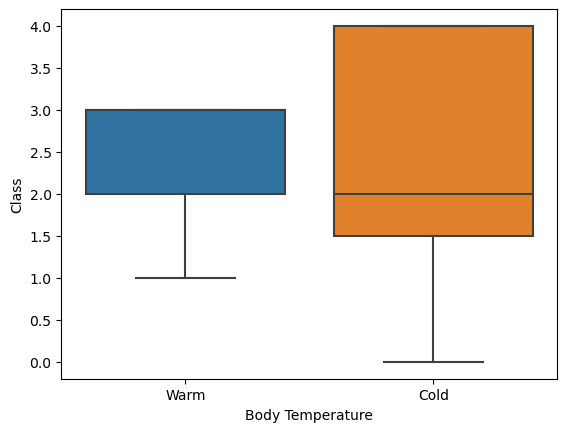

In [26]:
sns.boxplot('Body Temperature','Class',data=df)
plt.show()

#### Observation:
- The vertibrates having cold body temperature has different classes than warm temperature vertibrate.

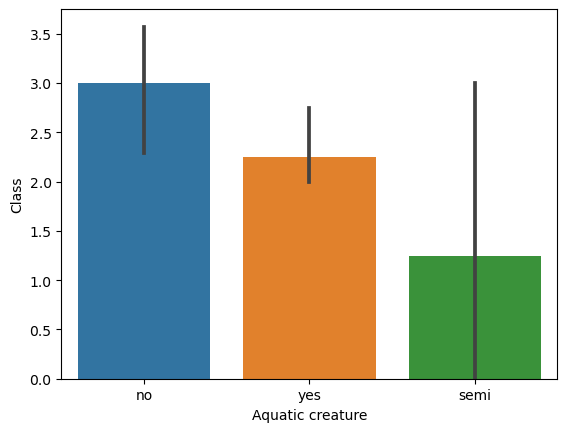

In [29]:
sns.barplot('Aquatic creature','Class',data=df)
plt.show()

### Observation:
- The vertibrates whose are semi aquatic are less than other.
- More number of vertibrates are of non aquatic in nature.

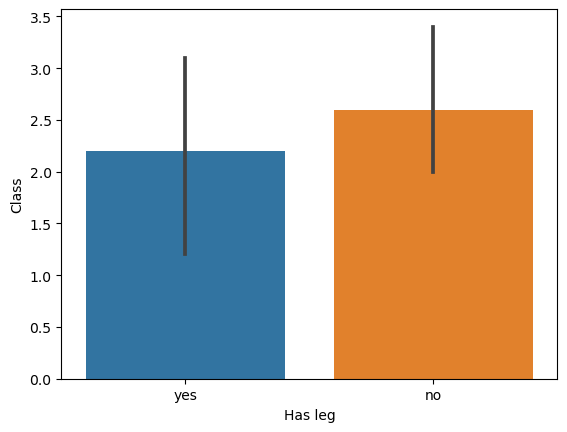

In [34]:
sns.barplot('Has leg','Class',data=df)
plt.show()

#### Observation:
- More number of vertibrates who has no legs.

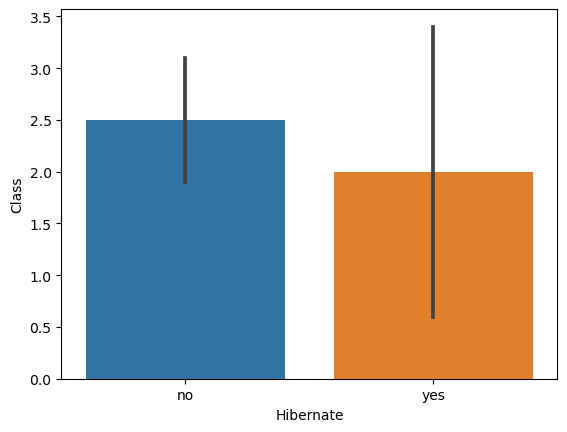

In [35]:
sns.barplot('Hibernate','Class',data=df)
plt.show()

#### Observation:
- More number of vertibrates has no hibernation property.
- Amphibians has property to hibernate.

### Data Modelling
#### Decision Tree:
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.                                         
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


#### Covert data into numeric form
To convert data, we use label encoder method.
#### LabelEncoder:
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
df = df[['Body Temperature', 'Skin cover','Gives birth','Aquatic creature','Has leg','Hibernate']].apply(le.fit_transform)

In [39]:
df

,Body Temperature,Skin cover,Gives birth,Aquatic creature,Has leg,Hibernate
0,1,2,1,0,1,0
1,0,5,0,0,0,1
2,0,5,0,2,0,0
3,1,2,1,2,0,0
4,0,3,0,1,1,1
5,0,5,0,0,1,0
6,1,2,1,0,1,1
7,1,0,0,0,1,0
8,1,1,1,0,1,0
9,0,5,1,2,0,0


#### Prepare X and y

In [46]:
X=df.iloc[:,:-1]
X

,Body Temperature,Skin cover,Gives birth,Aquatic creature,Has leg
0,1,2,1,0,1
1,0,5,0,0,0
2,0,5,0,2,0
3,1,2,1,2,0
4,0,3,0,1,1
5,0,5,0,0,1
6,1,2,1,0,1
7,1,0,0,0,1
8,1,1,1,0,1
9,0,5,1,2,0


In [52]:
y=df.iloc[:,-1]
y

0     0
1     1
2     0
3     0
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    1
Name: Hibernate, dtype: int32

#### Analyze the model for logistic regression using Train-Test-Split Method.
Train Dataset: Used to fit the machine learning model.                                                
Test Dataset: Used to evaluate the fit machine learning model.

In [53]:
from sklearn.model_selection import train_test_split

#### Apply train, test to x and y 
Here we are using training set with the size of 0.6 (60 percent) means that the remainder percentage 0.3 (30 percent) is assigned to the test set.

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#### Print the shape for train and test data.

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 5)
(5, 5)
(10,)
(5,)


#### Apply Decision Tree Classifier 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model= DecisionTreeClassifier()

#### Fit the model

In [58]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predict the y value

In [59]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0])

#### Check the accuracy

In [60]:
model.score(X_train,y_train)*100

100.0

##### Model has 100% accuracy for train data.

In [61]:
model.score(X_test,y_test)*100

80.0

##### Model has 60% accuracy for test data.

#### New dataframe for actual and predicted values as:

In [62]:
df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_new

,Actual,Predicted
9,0,0
11,0,0
0,0,1
13,0,0
5,0,0


#### Plot confusion matrix
In the above output, we have seen that there were some incorrect predictions, so if we want to know the number of correct and incorrect predictions, we need to use the confusion matrix. 

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[4, 1],
       [0, 0]], dtype=int64)

In [65]:
from sklearn.metrics import plot_confusion_matrix

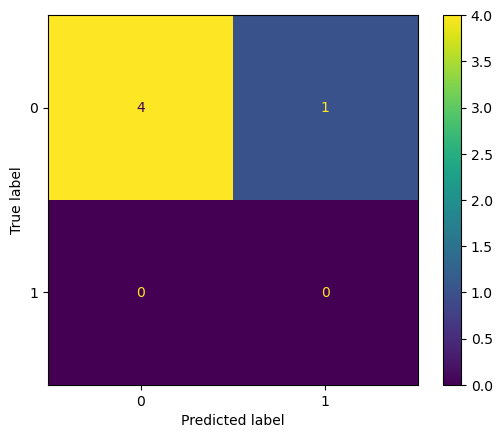

In [69]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In the above output image, we can see the confusion matrix, which has 1+0=1 incorrect predictions and 4+0=4 correct predictions. Therefore, we can say that compared to other classification models, the Decision Tree classifier made a good prediction.

#### Plot classfication report

In [112]:
from sklearn.metrics import classification_report

In [114]:
report= classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.47         5
weighted avg       0.70      0.60      0.60         5



#### Plot the decision tree

In [115]:
from sklearn import tree

In [117]:
df.columns

Index(['Body Temperature', 'Skin cover', 'Gives birth', 'Aquatic creature',
       'Has leg', 'Hibernate', 'Class'],
      dtype='object')

In [123]:
f=['Body Temperature','Skin cover', 'Gives birth', 'Aquatic creature', 'Has leg', 'Hibernate']
c=['Mammal','Reptile','Fish','Amphibian','Bird']

[Text(0.625, 0.875, 'Gives birth <= 0.5\ngini = 0.74\nsamples = 10\nvalue = [2, 1, 1, 4, 2]\nclass = Amphibian'),
 Text(0.5, 0.625, 'Skin cover <= 4.0\ngini = 0.722\nsamples = 6\nvalue = [2, 1, 1, 0, 2]\nclass = Mammal'),
 Text(0.25, 0.375, 'Aquatic creature <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0, 0]\nclass = Mammal'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]\nclass = Reptile'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]\nclass = Mammal'),
 Text(0.75, 0.375, 'Aquatic creature <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 0, 2]\nclass = Bird'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Bird'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = Fish'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]\nclass = Amphibian')]

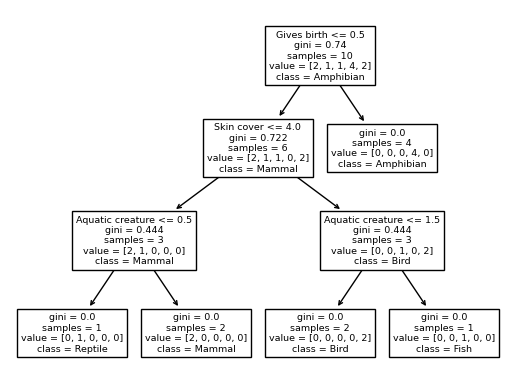

In [128]:
tree.plot_tree(model,feature_names=f,class_names=c)

#### Visualize the Decision tree

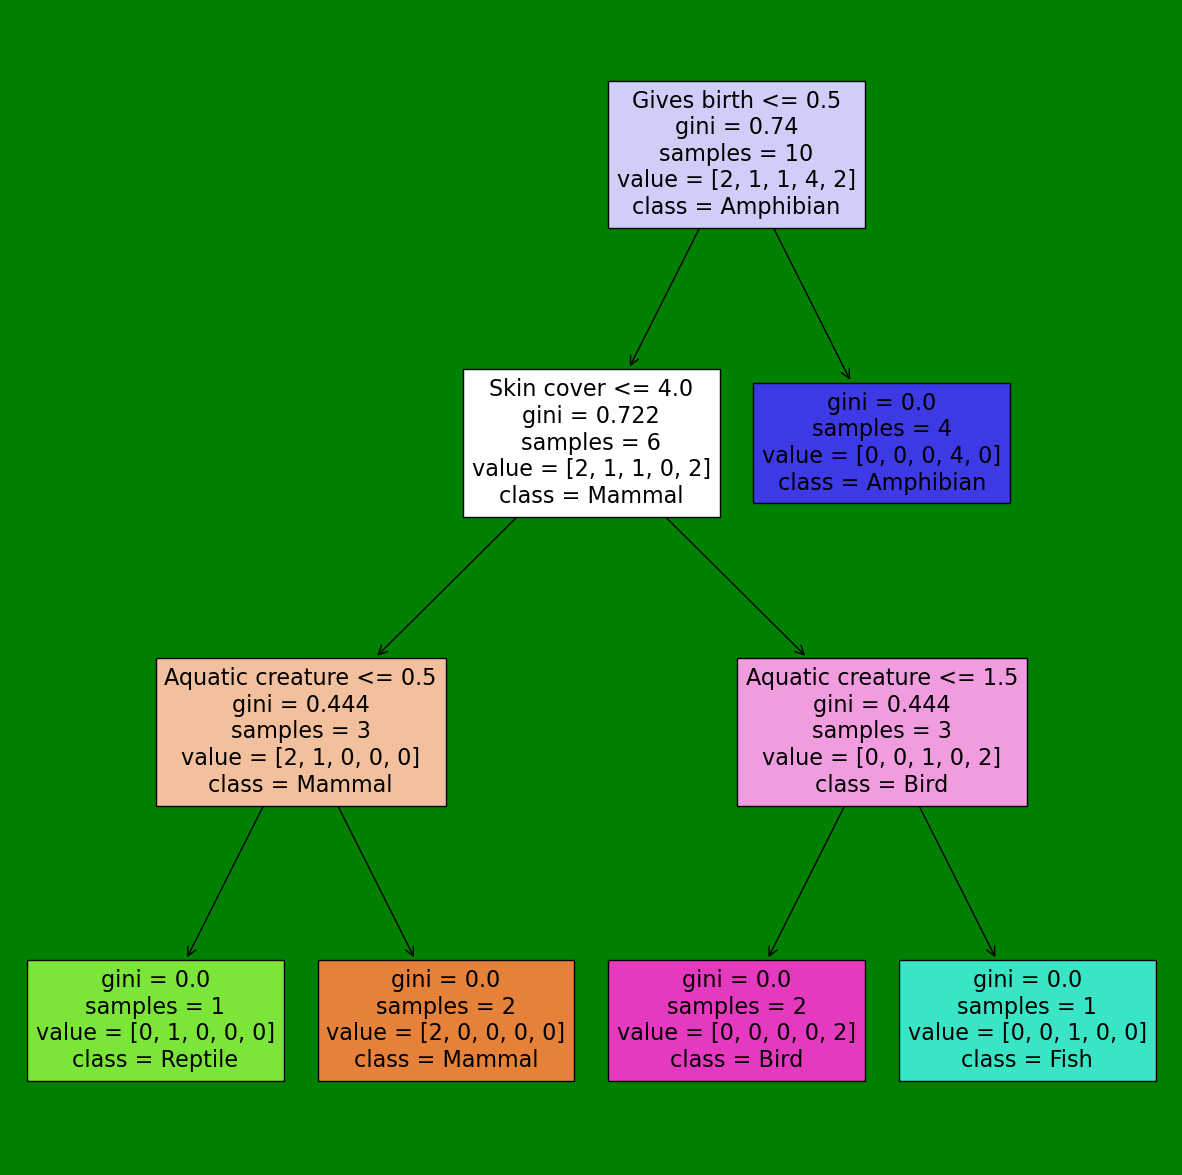

In [127]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,15),facecolor='g')
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)
fig.savefig('decision.png')
plt.show()

### Final Conclusion:
- The accuracy of the model is quite low,this is due to the less data present in dataset.
- The impurity is much less.
- The tree is effectively shows the classes of vertibrates.